In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir(r'C:\Users\63094\Downloads\hero wired\datacsv')
os.listdir()
df=pd.read_csv('Dataset (4).csv')
df


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
x=df.drop(['not.fully.paid'],axis=1)
y=df['not.fully.paid']

In [4]:
x.shape

(9578, 13)

In [5]:
df1=pd.get_dummies(x)
df1

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,0,0,0,0,1,0,0


### for principal component anlysis we need to scale the data

### but there is one  mistory why we need scaling?????
### PCA tries to get the features with maximum variance and the variance is high for high magnitude features.

This skews the PCA towards high magnitude features —which might lead to improper selection of principle components.

That’s why we require feature scaling before applying PCA (Standardization , not normalization)

It is essential to perform feature scaling before running PCA if there is a significant difference in the scale between the features of the dataset;
for example, one feature ranges in values between 0 and 1 and another between 100 and 1,000. PCA is very sensitive to the relative ranges of the original features.

In [6]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(df1)

StandardScaler()

In [7]:
df_sc=scalar.transform(df1)
df_sc
pd.DataFrame(df_sc,columns=df1.columns)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.492222,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,-0.567142,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
1,0.492222,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,-0.567142,2.567010,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855
2,0.492222,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,-0.567142,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
3,0.492222,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,-0.567142,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
4,0.492222,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,-0.567142,2.567010,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,-2.031603,0.873884,0.123976,2.031030,-0.322023,-1.023118,2.368325,5.879467,1.216726,0.192048,-0.299730,-0.237003,1.763226,-0.389558,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855
9574,-2.031603,0.099083,-0.296481,0.341170,-1.800898,0.293761,-0.072400,-0.495638,-1.575135,1.555604,-0.299730,-0.237003,1.763226,-0.389558,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855
9575,-2.031603,-0.578868,-1.068670,-0.545694,0.070213,-0.628054,-0.444860,-0.203765,1.244300,2.919159,-0.299730,-0.237003,-0.567142,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
9576,-2.031603,1.391660,0.156914,-0.182730,0.954924,-0.496366,-1.105722,-0.501089,-1.502753,1.555604,-0.299730,-0.237003,-0.567142,-0.389558,-0.839028,-0.192721,3.771915,-0.218647,-0.262855


###  after scaling the data we apply the P.C.A

In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,random_state=23)

In [9]:
pca.fit(df_sc)

PCA(n_components=2, random_state=23)

In [10]:
df_sc_pca=pca.fit_transform(df_sc)

In [11]:
df_sc_pca

array([[ 0.41897372,  2.37629418],
       [ 0.0279028 ,  0.30660016],
       [ 0.32446602, -0.40319429],
       ...,
       [ 1.85866768, -1.64221093],
       [ 0.97505343, -0.92111697],
       [ 2.10222339,  1.46383339]])

In [12]:
pd.DataFrame(df_sc_pca,columns=['pc1','pc2'])

,pc1,pc2
0,0.418974,2.376294
1,0.027903,0.306600
2,0.324466,-0.403194
3,0.002977,0.204775
4,0.599487,-0.304381
...,...,...
9573,2.406759,3.062382
9574,-0.967725,-1.299571
9575,1.858668,-1.642211
9576,0.975053,-0.921117


<Figure size 1080x1440 with 0 Axes>

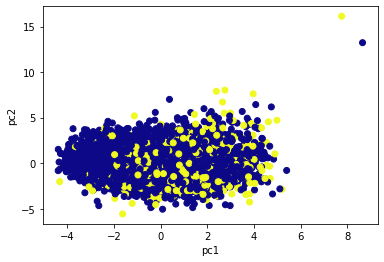

<Figure size 1080x1440 with 0 Axes>

In [13]:
plt.scatter(df_sc_pca[:,0],df_sc_pca[:,1],c=df['not.fully.paid'], cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.figure(figsize=(15,20))

In [14]:
df['target']=df['not.fully.paid']

In [15]:
 
y_sc=df['not.fully.paid']

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(df_sc_pca,y_sc,test_size=0.2)

<IPython.core.display.Javascript object>

In [17]:
xtrain.shape

(7662, 2)

In [18]:
xtest.shape

(1916, 2)

### Decision tree classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [20]:
model.score(xtest,ytest)

0.7411273486430062

In [21]:
model.score(xtrain,ytrain)

1.0

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import cross_val_score

In [23]:
y_pred_test=model.predict(xtest)

<AxesSubplot:>

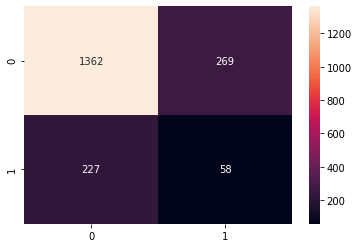

In [24]:
cm=confusion_matrix(ytest,y_pred_test)
sns.heatmap(cm,annot=True,fmt='g')

In [25]:
y_pred_train=model.predict(xtrain)

<AxesSubplot:>

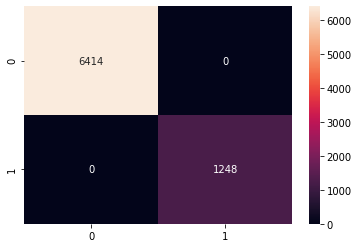

In [26]:
cm=confusion_matrix(ytrain,y_pred_train)
sns.heatmap(cm,annot=True,fmt='g')

In [27]:
cr=classification_report(ytest,y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1631
           1       0.18      0.20      0.19       285

    accuracy                           0.74      1916
   macro avg       0.52      0.52      0.52      1916
weighted avg       0.76      0.74      0.75      1916



In [28]:
cr=classification_report(ytrain,y_pred_train)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6414
           1       1.00      1.00      1.00      1248

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662



In [29]:
r=roc_auc_score(ytest,y_pred_test)
r

0.519289640410038

### logistic 

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model_2=LogisticRegression()
model_2.fit(xtrain,ytrain)

LogisticRegression()

In [32]:
y_pred_test_2=model_2.predict(xtest)
y_pred_train_2=model.predict(xtrain)

<AxesSubplot:>

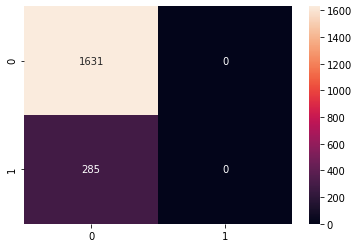

In [33]:
cm=confusion_matrix(ytest,y_pred_test_2)
sns.heatmap(cm,annot=True,fmt='g')

In [34]:
cr=classification_report(ytrain,y_pred_train_2)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6414
           1       1.00      1.00      1.00      1248

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662



<AxesSubplot:>

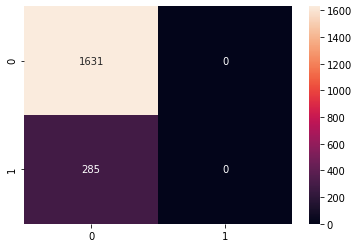

In [35]:
cm=confusion_matrix(ytest,y_pred_test_2)
sns.heatmap(cm,annot=True,fmt='g')

In [36]:
cr=classification_report(ytest,y_pred_test_2)
print(cr)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1631
           1       0.00      0.00      0.00       285

    accuracy                           0.85      1916
   macro avg       0.43      0.50      0.46      1916
weighted avg       0.72      0.85      0.78      1916



C:\Users\63094\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\63094\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\63094\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### balancing

In [37]:
from imblearn import over_sampling,under_sampling
from imblearn.over_sampling import RandomOverSampler

In [38]:
ros=RandomOverSampler( random_state=23)
x_rs,y_rs=ros.fit_resample(df_sc_pca,y_sc)
x_train,x_test,y_train,y_test=train_test_split(x_rs,y_rs,test_size=0.25)
y_pred_train_rs=model.predict(x_train)

<IPython.core.display.Javascript object>

In [39]:
y_train.value_counts()

1    6072
0    5995
Name: not.fully.paid, dtype: int64

In [51]:
from sklearn import tree 
model_2_d=tree.DecisionTreeClassifier()
model_2_d.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
model_2_d.score(x_test,y_test)

0.9023117076808352

In [42]:
model_2_d.score(x_train,y_train)

1.0

In [43]:
y_pred_test_2_d=model_2_d.predict(x_test)
y_pred_train_2_d=model_2_d.predict(x_train)

<AxesSubplot:>

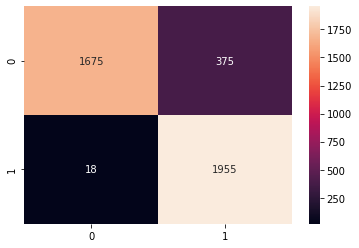

In [44]:
cm_d=confusion_matrix(y_test,y_pred_test_2_d)
sns.heatmap(cm_d,annot=True,fmt='g')

<AxesSubplot:>

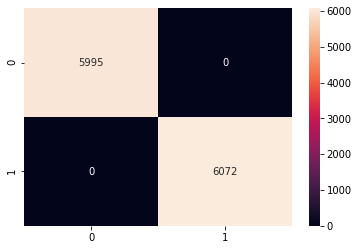

In [45]:
cm_d=confusion_matrix(y_train,y_pred_train_2_d)
sns.heatmap(cm_d,annot=True,fmt='g')

In [46]:
cr=classification_report(y_train,y_pred_train_2_d)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5995
           1       1.00      1.00      1.00      6072

    accuracy                           1.00     12067
   macro avg       1.00      1.00      1.00     12067
weighted avg       1.00      1.00      1.00     12067



In [47]:
cr=classification_report(y_test,y_pred_test_2_d)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      2050
           1       0.84      0.99      0.91      1973

    accuracy                           0.90      4023
   macro avg       0.91      0.90      0.90      4023
weighted avg       0.92      0.90      0.90      4023



In [56]:
a=cross_val_score(model_2_d,x_rs,y_rs,cv=10)
a.mean()

0.9110627719080174

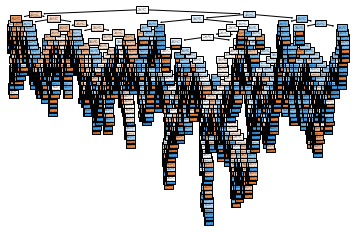

In [53]:
tree.plot_tree(model_2_d,filled=True);